In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [7]:
fdataset=pd.read_csv('framingham.csv')

In [8]:
fdataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
#check for the NaN values in each column
fdataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
fdataset.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [11]:
#has missing values did  pre-processing ,filled it by 0
fdataset['education']=fdataset['education'].fillna(0)
fdataset['cigsPerDay']=fdataset['cigsPerDay'].fillna(0)
fdataset['BPMeds']=fdataset['BPMeds'].fillna(0)
fdataset['totChol']=fdataset['totChol'].fillna(0)
fdataset['BMI']=fdataset['BMI'].fillna(0)
fdataset['heartRate']=fdataset['heartRate'].fillna(0)
fdataset['glucose']=fdataset['glucose'].fillna(0)

In [12]:
fdataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


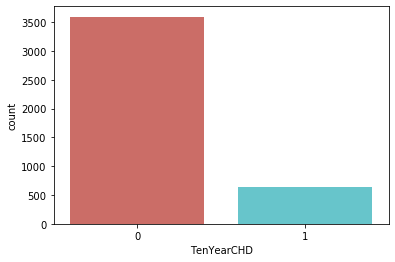

In [14]:
#ploting the value of Dependent Varible

sns.countplot(x='TenYearCHD',data=fdataset,palette='hls') # histogram plot of total positive and negative on TenYearCHD
plt.show()

In [15]:
#spliting the variable into independent and dependent means independent is the variable using which we do prediction dependent is the parameter of reference i.e:TenYearCHD

x=fdataset[['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y=fdataset['TenYearCHD']

In [16]:
#Split the dataset into training and test set 70%train 30%test choose more test data and check for better accuracy

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
#applying logistic funtion and training the model using fit funtion

logr=LogisticRegression()
logr.fit(x_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
#prdicting the model on test set

y_pred=logr.predict(x_test)

In [19]:
#Creating the confusion matrix and defining TP,Tn,Fp,Fn

cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[1070,    4],
       [ 190,    8]])

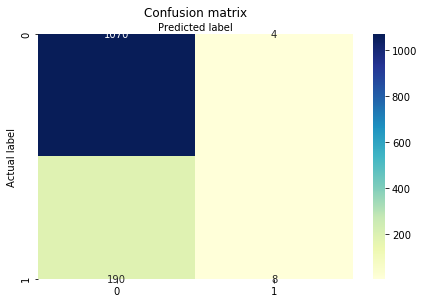

In [30]:
#A hotspot for better recall precision visualization
lkb=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(lkb))
plt.xticks(tick_marks, lkb)
plt.yticks(tick_marks, lkb)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [31]:
#check accuracy recall and precision of the prediction on test data.


print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.8474842767295597
0.6666666666666666
0.04040404040404041
